<a href="https://colab.research.google.com/github/samho22/QTM350/blob/main/QTM350TricoloreFinalProjectAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AWS Translate Final Analysis**

Hello! This notebook will walk you through our final analysis of AWS Translate after gathering all of our data. Reading through this notebok will show you how to import your data, create summary statistics, visualize your data, fit a linear regression model, and conduct an ANOVA test.


### **Import the Data**


We will be importing two datasets that are in different formats, but have the same underlying data. One will be in a wide dataframe while the other will be a long dataframe. This is to ensure we can conduct thorough analysis on our collected data without being confined nor restricted by our dataformat. This data represents the percent similarity score ("accuracy score") generated by comparing the AWS translation to our own native translation through this [website](https://countwordsfree.com/comparetexts). 

We uploaded our datasets on our github repo in order to publicly access it on Google Colaboratory. We imported the raw data using the github link.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
dfAccuracyScoreswide = pd.read_csv('https://raw.githubusercontent.com/samho22/QTM350/main/AccuracyScoreWide.csv') 

This is the wide dataframe of all 8 langauges with each of the four phrases and their associated accuracy scores. 

In [6]:
dfAccuracyScoreswide

,Languages,Slang Phrase 1,Formal Phrase 1,Slang Phrase 2,Formal Phrase 2
0,Korean,14.77,30.85,10.38,15.54
1,Simplified Mandarin,23.19,42.86,12.50,42.31
2,Tagalog,31.43,84.18,10.10,63.81
3,Hindi,4.29,42.16,18.64,43.08
4,Spanish(Mexico),67.74,67.76,16.33,52.94
5,French,57.14,67.16,58.33,62.91
6,German,95.81,94.21,49.55,15.92
7,Portuguese,52.17,66.09,42.20,67.80


This imports the long dataframe, which includes the LanguageCategory distinction between "asian" and "nonasian" languages.

In [7]:
dfAccuracyScoreslong = pd.read_csv('https://raw.githubusercontent.com/samho22/QTM350/main/AccuracyScoreLong.csv')

In [ ]:
dfAccuracyScoreslong

### **Creating Data Visualizations**

Now, we want to create visualizations with these datagrames to test our hypotheses: 
1. Spanish will have the highest accuracy score.
2. Asian languages will have lower accuracy scores than European languages.
3. The informal phrases will have a lower accuracy score than the formal phrases. 

First, we plotted the accuracy percentage of each phrase for each language as a clustered bar graph. 

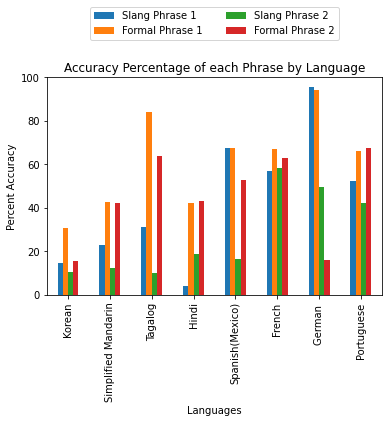

In [9]:
dfAccuracyScoreswide.plot.bar(x="Languages")
plt.ylabel("Percent Accuracy")
plt.ylim([0, 100])
plt.title('Accuracy Percentage of each Phrase by Language')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)

In this graph, we can see that French has the most consistent accuracy score across all four phrases, but German Formal and Slang Phrase 1 both had the highest overall score of around 95%. Spanish clearly did not have the highest percent accuracy for any of the four phrases, which provides evidence against our first hypothesis. Overall, the Korean translations had the lowest accuracy scores.

Next, we wanted to look specifically at the difference between slang and formal phrases. We averaged the 2 pairs for each language and created another bar graph using the Slang Average score and Formal Average score. 

Text(0.5, 1.0, 'Percent Accuracy of Each Language by Slang vs Formal Phrase')

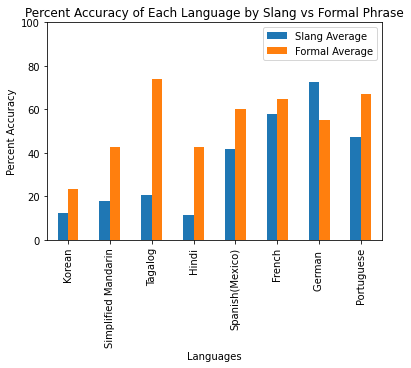

In [10]:
newdf=dfAccuracyScoreswide
newdf["Slang Average"] = newdf[["Slang Phrase 1", 'Slang Phrase 2']].mean(axis=1)
newdf["Formal Average"]= newdf[["Formal Phrase 1 ", "Formal Phrase 2"]].mean(axis=1)

newdf.plot.bar(x="Languages", y=["Slang Average","Formal Average"])
plt.ylabel("Percent Accuracy")
plt.ylim([0, 100])
plt.title('Percent Accuracy of Each Language by Slang vs Formal Phrase')

To get a better overall image of how accurate AWS Translate's translations are for each language, we averaged out the total accuracy scores for all four phrases into one overall accuracy score, then made another bar plot.

In [11]:
newdf['Overall Average'] = newdf[['Formal Average', 'Slang Average']].mean(axis=1)
newdf

,Languages,Slang Phrase 1,Formal Phrase 1,Slang Phrase 2,Formal Phrase 2,Slang Average,Formal Average,Overall Average
0,Korean,14.77,30.85,10.38,15.54,12.575,23.195,17.8850
1,Simplified Mandarin,23.19,42.86,12.50,42.31,17.845,42.585,30.2150
2,Tagalog,31.43,84.18,10.10,63.81,20.765,73.995,47.3800
3,Hindi,4.29,42.16,18.64,43.08,11.465,42.620,27.0425
4,Spanish(Mexico),67.74,67.76,16.33,52.94,42.035,60.350,51.1925
5,French,57.14,67.16,58.33,62.91,57.735,65.035,61.3850
6,German,95.81,94.21,49.55,15.92,72.680,55.065,63.8725
7,Portuguese,52.17,66.09,42.20,67.80,47.185,66.945,57.0650


Text(0.5, 1.0, 'Overall Percent Accuracy of Each Language')

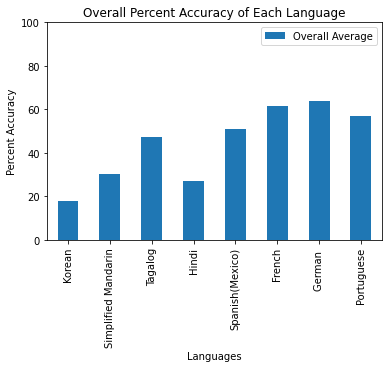

In [12]:
newdf.plot.bar(x="Languages", y='Overall Average')
plt.ylabel("Percent Accuracy")
plt.ylim([0, 100])
plt.title('Overall Percent Accuracy of Each Language')

Overall, German had the most accurate AWS translations, followed closely by French and then Portuguese. The lowest scoring language translations were Korean, then Hindi and Simplifed Mandarin.

## **Analyzing Asian vs Non-Asian Languages**

Next, we will look specifically at the distinction between Asian langauges versus Non-Asian langauges. Below, we group the long dataset by Phrase and Language Category in order to perform our analysis. 

In [14]:
avna = dfAccuracyScoreslong.groupby(['Phrase', "LanguageCategory"]).mean().reset_index()

In [15]:
avna

,Phrase,LanguageCategory,Accuracy
0,formal,asian,45.59875
1,formal,nonasian,61.84875
2,slang,asian,15.66125
3,slang,nonasian,54.90875


Next, in order to graph it, we created a new column that categorizes the Language and Phrase together.

In [16]:
avna['LanguagePhrase'] = avna["Phrase"].astype(str) +" " + avna["LanguageCategory"]

In [17]:
avna

,Phrase,LanguageCategory,Accuracy,LanguagePhrase
0,formal,asian,45.59875,formal asian
1,formal,nonasian,61.84875,formal nonasian
2,slang,asian,15.66125,slang asian
3,slang,nonasian,54.90875,slang nonasian


Text(0.5, 1.0, 'Asian vs NonAsian Language Percent Accuracy')

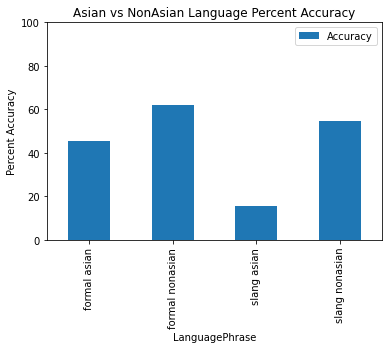

In [18]:
avna.plot.bar(x="LanguagePhrase", y=['Accuracy'])
plt.ylabel("Percent Accuracy")
plt.ylim([0, 100])
plt.title("Asian vs NonAsian Language Percent Accuracy")

As hypothesized, Asian languages have a lower accuracy translation score than non-Asian languages. Both formal and slang phrases of non-Asian languages scored higher than the Asian translations of the same formal and slang phrases. 

# **ANOVA Test**

We conducted an ANOVA Test to determine if whether the language category or phrase type has a significant effect on the translation's accuracy score. Also, this will determine if there is any interaction effect between the two factors. Our null hypothesis is that there is no difference in accuracy scores between the language category (Asian and non-Asian) and phrase types (formal and slang). Our alternative hypothesis is that there is a significant difference in accuracy score between the language categories as well as between formal phrases and slang phrases.

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
model = ols('Accuracy ~ C(LanguageCategory) + C(Phrase) + C(LanguageCategory):C(Phrase)', data=dfAccuracyScoreslong).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(LanguageCategory),6159.945012,1.0,16.609151,0.000343
C(Phrase),2719.900013,1.0,7.333707,0.011407
C(LanguageCategory):C(Phrase),1057.770013,1.0,2.852081,0.102364
Residual,10384.544150,28.0,NaN,NaN


Since the p-values for both language category and phrase are less than 0.05, we can reject the null hypothesis and be confident that both factors have a statistically significant effect on accuracy scores. Additionally, since the p-value for the interaction effect is not less than 0.05, we can be confident that there is no significant interaction between Language Category and Phrase Type. 

# **Regression Analysis**

We also conducted a regression analysis to identify to what extent the language and phrase type impact the accuracy score. Our two coefficients were Language Category and Phrase Type, with both coefficients representing dummy variables. Therefore, our model will look like this: 

$$ Accuracy_{estimate} = \beta _0  +\beta _ 1LanguageCategory + \beta _2Phrase + residual $$

In [21]:
import statsmodels.formula.api as smf

results = smf.ols('Accuracy ~ LanguageCategory+Phrase', data=dfAccuracyScoreslong).fit()
results.params

Intercept                       39.849375
LanguageCategory[T.nonasian]    27.748750
Phrase[T.slang]                -18.438750
dtype: float64

In [23]:
results.tvalues

Intercept                       6.552061
LanguageCategory[T.nonasian]    3.951213
Phrase[T.slang]                -2.625539
dtype: float64

As we can see, non-Asian languages are roughly 27.75% more accurate than asian languages when translated by AWS Translate. Additionally, we see that slang phrases are 18.44% less accurate than formal phrases when translated. This lines up with our initial hypothesis as previously stated. Language Category is statistically significant at the 1% level, and Phrase is significant at the 5% level.

# **Survey Data Analysis**

Now let's take a look at the data we collected from our survey to analyze what other native speakers think about the AWS Translate translations. We asked respondents to rate the accuracy and fluency of the translations on a scale of 1-5. 

As this isn't our primary data, we won't go into deep analysis of our results, but we will observe overall trends and similarities with our primary data. We cannot do any statistical testing on this data because we only got 100 responses, which is too small of a sample to draw accurate conclusions.

Let's import our survey data.

In [24]:
dfsurvey = pd.read_csv('https://raw.githubusercontent.com/samho22/QTM350/main/Survey%20Language%20Score.csv')
dfsurvey

,Language,Language Category,Formal Accuracy Score,Formal Fluency Score,Formal Language Score,Casual Accuracy Score,Casual Fluency Score,Casual Language Score
0,Portuguese,nonasian,4.000000,3.428571,7.428571,2.571429,2.142857,4.714286
1,French,nonasian,2.833333,1.666667,4.500000,3.000000,1.333333,4.333333
2,Hindi,asian,3.115385,2.615385,5.730769,2.038462,1.615385,3.653846
3,German,nonasian,3.000000,2.166667,5.166667,3.416667,3.583333,7.000000
4,Korean,asian,3.062500,2.625000,5.687500,2.125000,1.187500,3.312500
5,Spanish,nonasian,4.590909,3.636364,8.227273,2.863636,2.363636,5.227273
6,Mandarin,asian,2.875000,2.625000,5.500000,1.500000,1.500000,3.000000
7,Tagalog,asian,2.576923,2.134615,4.711538,1.884615,1.711538,3.596154


Let's visualize the different accuracy and fluency scores between formal and casual phrases through a bar plot.

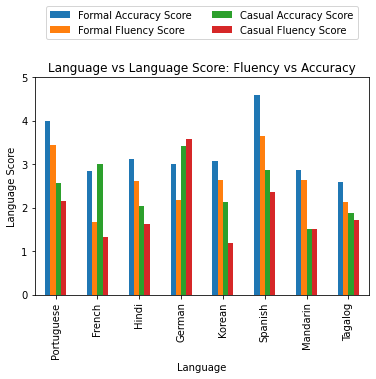

In [25]:
dfsurvey.plot.bar(x="Language", y=["Formal Accuracy Score", "Formal Fluency Score", "Casual Accuracy Score", "Casual Fluency Score"])
plt.ylabel("Language Score")
plt.ylim([0, 5])
plt.title("Language vs Language Score: Fluency vs Accuracy")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)

Next, let's visualize the overall language scores of formal and casual phrases. The language score is the summation of the respondant's accuracy and fluency scores.

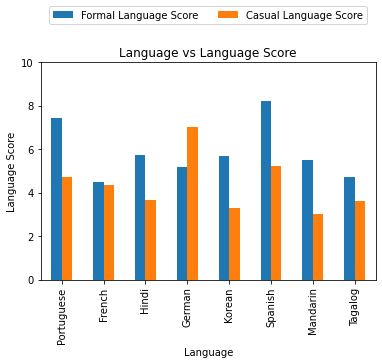

In [26]:
dfsurvey.plot.bar(x="Language", y=["Formal Language Score", "Casual Language Score"])
plt.ylabel("Language Score")
plt.ylim([0, 10])
plt.title("Language vs Language Score")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)

Here, we evaluate the overall language score of each language averaging out the formal and casual language scores.

Text(0.5, 1.0, 'Overall Language Score of Each Language')

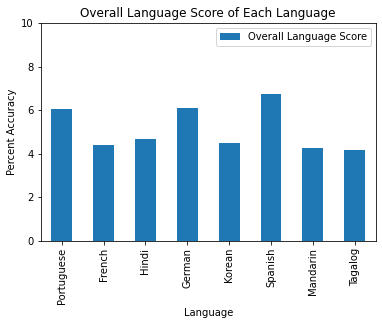

In [ ]:
dfsurvey['Overall Language Score'] = dfsurvey[['Formal Language Score', 'Casual Language Score']].mean(axis=1)
dfsurvey.plot.bar(x="Language", y='Overall Language Score')
plt.ylabel("Percent Accuracy")
plt.ylim([0, 10])
plt.title('Overall Language Score of Each Language')

As seen in the visualizations above, the survey results also show an overall similar conclusion to our primary data. It is interesting to see even in survey data that the German casual scores still score higher than their formal translation scores.

When looking at the overall language score, however, Spanish scored higher amongst survey score data and when taking into consideration fluency of the AWS Translation. Also, in contrast to our primary data, Korean is no longer the lowest scored language, replaced by Tagalog.

It is important to note that there was not an equal distribution of responses for each language and there was no way for us to confirm that the respondents were truly native or fluent speakers. This may explain the discrepancies between the survey results and our primary data.

# **Conclusion**

In conclusion, our primary results supported most of our hypotheses. We hypothesized correctly that 

**1. Asian languages will be less accurately translated than Non-Asian languages.**

This is likely due to the fact that most Asian languages - especially Korean - have many specific endings and grammar based on what type of person you are addressing. This would explain why Korean was always the lowest score for accuracy. Mandarin also likely had a low accuracy score because it is a picture-based language, while English is an alphabet-based language. It also is not a Latin-basd language while English is.

**2. Informal phrases will be less accurately translated than formal phrases.**

This is likely due to the fact that there are many regional dialects and informal dictionaries that locals use. A computer program would have to be manually integrated with all of these dialects and slang words in order to translate them accurately. 

---------

However, our third hypothesis that Spanish would be the most accurately translated language proved to be false; German actually was. German and English are both West Germanic languages while Spanish is a Romance language, which could be one factor in explaining the differences in accuracy.

Based on the outcome and analysis, AWS Translate service is not the most adequate tool for translating English phrases into Asian languages, nor is it the most accurate tool for translating slang English phrases overall. 

Thank you everyone for following our analysis! We hope you gained better insight into AWS Translate's service and how it can be suited based on your specific langauge needs. 